In [ ]:
IMPORTING LIBRARIES

In [3]:
import pandas as pd

In [ ]:
READING DATASETS TO DATAFRAME

In [4]:
content = pd.read_csv('content.csv')
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [7]:
reactions = pd.read_csv('Reactions.csv')
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [9]:
reaction_types = pd.read_csv('ReactionTypes.csv')
reaction_types.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [ ]:
CLEANING THE DATASETS

In [11]:
content.duplicated().sum()

np.int64(0)

In [13]:
content.isna().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [15]:
reactions.duplicated().sum()

np.int64(0)

In [17]:
reactions.isna().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [19]:
content = content.drop(columns = ['URL', 'User ID'])

In [21]:
reactions = reactions.drop(columns = 'User ID')

In [23]:
reaction_types.duplicated().sum()

np.int64(0)

In [25]:
reaction_types.isna().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [27]:
reactions = reactions.dropna()

In [29]:
reactions.isna().sum()

Unnamed: 0    0
Content ID    0
Type          0
Datetime      0
dtype: int64

In [31]:
content = content.copy()
content.rename(columns = {'Unnamed: 0': "index"}, inplace = True)
content.rename(columns = {'Type': "ContentType"}, inplace = True)

reactions = reactions.copy()
reactions.rename(columns = {'Unnamed: 0': "index"}, inplace = True)

reaction_types = reaction_types.copy()
reaction_types.rename(columns = {'Unnamed: 0': "index"}, inplace = True)

In [33]:
content['ContentType'].unique()

array(['photo', 'video', 'GIF', 'audio'], dtype=object)

In [35]:
content['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [37]:
content['Category'] = content['Category'].str.replace('"', '').str.strip().str.title()

In [39]:
content['Category'].unique()

array(['Studying', 'Healthy Eating', 'Technology', 'Food', 'Cooking',
       'Dogs', 'Soccer', 'Public Speaking', 'Science', 'Tennis', 'Travel',
       'Fitness', 'Education', 'Veganism', 'Animals', 'Culture'],
      dtype=object)

In [41]:
reactions['Type'].unique()

array(['disgust', 'dislike', 'scared', 'interested', 'peeking', 'cherish',
       'hate', 'love', 'indifferent', 'super love', 'intrigued',
       'worried', 'like', 'heart', 'want', 'adore'], dtype=object)

In [43]:
reactions['Datetime'].unique()

array(['2020-11-07 09:43:50', '2021-06-17 12:22:51',
       '2021-04-18 05:13:58', ..., '2020-09-12 03:54:58',
       '2020-11-04 20:08:31', '2021-01-04 04:55:11'], dtype=object)

In [45]:
reactions['Datetime'] = pd.to_datetime(reactions['Datetime'])

In [47]:
content.head()

,index,Content ID,ContentType,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,Healthy Eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,Healthy Eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,Technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,video,Food


In [49]:
reactions.head()

,index,Content ID,Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [51]:
reaction_types

,index,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [53]:
reaction_types.isna().sum()

index        0
Type         0
Sentiment    0
Score        0
dtype: int64

In [ ]:
DATA MODELLING

In [55]:
df = content.merge(reactions, on='Content ID', how='left').merge(reaction_types, on='Type', how='left')
df

,index_x,Content ID,ContentType,Category,index_y,Type,Datetime,index,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,1.0,disgust,2020-11-07 09:43:50,2.0,negative,0.0
1,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,2.0,dislike,2021-06-17 12:22:51,11.0,negative,10.0
2,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,3.0,scared,2021-04-18 05:13:58,14.0,negative,15.0
3,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,4.0,disgust,2021-01-06 19:13:01,2.0,negative,0.0
4,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,5.0,interested,2020-08-23 12:25:58,4.0,positive,30.0
...,...,...,...,...,...,...,...,...,...,...
24606,999,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,25548.0,dislike,2020-06-27 09:46:48,11.0,negative,10.0
24607,999,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,25549.0,intrigued,2021-02-16 17:17:02,12.0,positive,45.0
24608,999,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,25550.0,interested,2020-09-12 03:54:58,4.0,positive,30.0
24609,999,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,25551.0,worried,2020-11-04 20:08:31,15.0,negative,12.0


In [57]:
df.isna().sum()

index_x         0
Content ID      0
ContentType     0
Category        0
index_y        38
Type           38
Datetime       38
index          38
Sentiment      38
Score          38
dtype: int64

In [59]:
df = df.drop(columns=['index_x', 'index_y', 'index'])

In [61]:
df

,Content ID,ContentType,Category,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0.0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,2021-06-17 12:22:51,negative,10.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,scared,2021-04-18 05:13:58,negative,15.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,interested,2020-08-23 12:25:58,positive,30.0
...,...,...,...,...,...,...,...
24606,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,dislike,2020-06-27 09:46:48,negative,10.0
24607,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,intrigued,2021-02-16 17:17:02,positive,45.0
24608,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,interested,2020-09-12 03:54:58,positive,30.0
24609,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,worried,2020-11-04 20:08:31,negative,12.0


In [185]:
df.isna().sum()

Content ID      0
ContentType     0
Category        0
Type           38
Datetime       38
Sentiment      38
Score          38
dtype: int64

In [63]:
df.dropna()

,Content ID,ContentType,Category,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0.0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,2021-06-17 12:22:51,negative,10.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,scared,2021-04-18 05:13:58,negative,15.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,interested,2020-08-23 12:25:58,positive,30.0
...,...,...,...,...,...,...,...
24606,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,dislike,2020-06-27 09:46:48,negative,10.0
24607,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,intrigued,2021-02-16 17:17:02,positive,45.0
24608,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,interested,2020-09-12 03:54:58,positive,30.0
24609,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,worried,2020-11-04 20:08:31,negative,12.0


In [65]:
df

,Content ID,ContentType,Category,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0.0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,2021-06-17 12:22:51,negative,10.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,scared,2021-04-18 05:13:58,negative,15.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,interested,2020-08-23 12:25:58,positive,30.0
...,...,...,...,...,...,...,...
24606,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,dislike,2020-06-27 09:46:48,negative,10.0
24607,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,intrigued,2021-02-16 17:17:02,positive,45.0
24608,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,interested,2020-09-12 03:54:58,positive,30.0
24609,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,worried,2020-11-04 20:08:31,negative,12.0


In [67]:
df.isna().sum()

Content ID      0
ContentType     0
Category        0
Type           38
Datetime       38
Sentiment      38
Score          38
dtype: int64

In [ ]:
Top 5 performing categories

In [69]:
top_5_performing_category = df.groupby('Category')['Score'].sum().sort_values(ascending=False)
top_5_performing_category.head()

Category
Animals           74965.0
Science           71168.0
Healthy Eating    69339.0
Technology        68738.0
Food              66676.0
Name: Score, dtype: float64

In [81]:
top_5 = top_5_performing_category.head()
top_5

Category
Animals           74965.0
Science           71168.0
Healthy Eating    69339.0
Technology        68738.0
Food              66676.0
Name: Score, dtype: float64

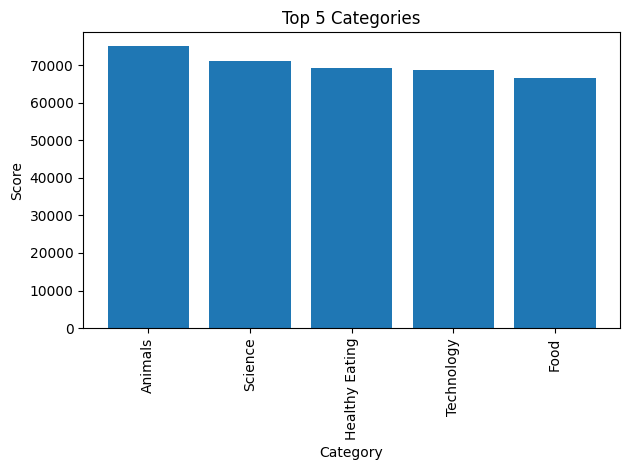

In [85]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(top_5.index, top_5.values)

ax.set_title('Top 5 Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Score')

ax.set_xticks(range(len(top_5.index)))
ax.set_xticklabels(top_5.index, rotation=90)

plt.tight_layout()  # To prevent label cut-off
plt.show()

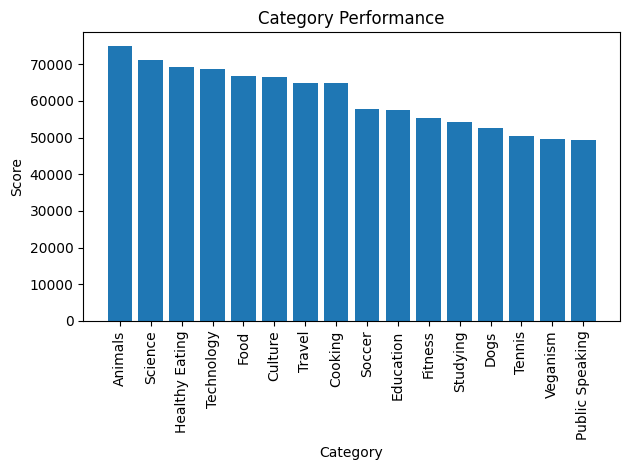

In [87]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(top_5_performing_category.index, top_5_performing_category.values)

ax.set_title('Category Performance')
ax.set_xlabel('Category')
ax.set_ylabel('Score')

ax.set_xticks(range(len(top_5_performing_category.index)))
ax.set_xticklabels(top_5_performing_category.index, rotation=90)

plt.tight_layout()  # To prevent label cut-off
plt.show()


In [ ]:
UNIQUE CATEGORIES

In [89]:
unique_categories = df['Category'].unique()
unique_categories

array(['Studying', 'Healthy Eating', 'Technology', 'Food', 'Cooking',
       'Dogs', 'Soccer', 'Public Speaking', 'Science', 'Tennis', 'Travel',
       'Fitness', 'Education', 'Veganism', 'Animals', 'Culture'],
      dtype=object)

In [107]:
top_categories = df.groupby('Category')['Score'].count().sort_values(ascending=False).head()

filtered_df = df[df['Category'].isin(top_categories.index)]

reactions_by_category = filtered_df.groupby('Category')['Type'].count()

reactions_by_category

Category
Animals           1897
Food              1699
Healthy Eating    1717
Science           1796
Technology        1698
Name: Type, dtype: int64

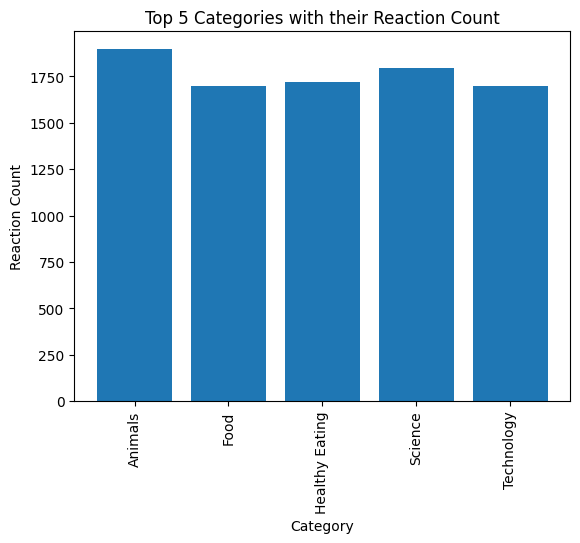

In [109]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(reactions_by_category.index, reactions_by_category.values)

ax.set_title('Top 5 Categories with their Reaction Count')
ax.set_xlabel('Category')
ax.set_ylabel('Reaction Count')

ax.set_xticks(range(len(reactions_by_category.index)))
ax.set_xticklabels(reactions_by_category.index, rotation=90)

#plt.tight_layout()  # To prevent label cut-off
plt.show()

In [ ]:
THE MONTH WITH THE MOST POST

In [105]:
df['Month'] = df['Datetime'].dt.month

In [115]:
post_per_month = df.groupby('Month')['Content ID'].count().sort_values(ascending=False).head()
post_per_month

Month
5.0     2138
1.0     2126
8.0     2114
12.0    2092
7.0     2070
Name: Content ID, dtype: int64

In [71]:
df

,Content ID,ContentType,Category,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0.0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,2021-06-17 12:22:51,negative,10.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,scared,2021-04-18 05:13:58,negative,15.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,interested,2020-08-23 12:25:58,positive,30.0
...,...,...,...,...,...,...,...
24606,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,dislike,2020-06-27 09:46:48,negative,10.0
24607,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,intrigued,2021-02-16 17:17:02,positive,45.0
24608,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,interested,2020-09-12 03:54:58,positive,30.0
24609,75d6b589-7fae-4a6d-b0d0-752845150e56,audio,Technology,worried,2020-11-04 20:08:31,negative,12.0


In [197]:
df.to_csv('CleanedSocialBuzz.csv', index=False)

In [201]:
top_5_performing_category.to_csv('top_5_performing_categories.csv', index=True)